In [10]:
%load_ext autoreload
%autoreload 2

import squidpy as sq
import txsim as tx
import skimage.io
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
my_dpi = _dpi = 72

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


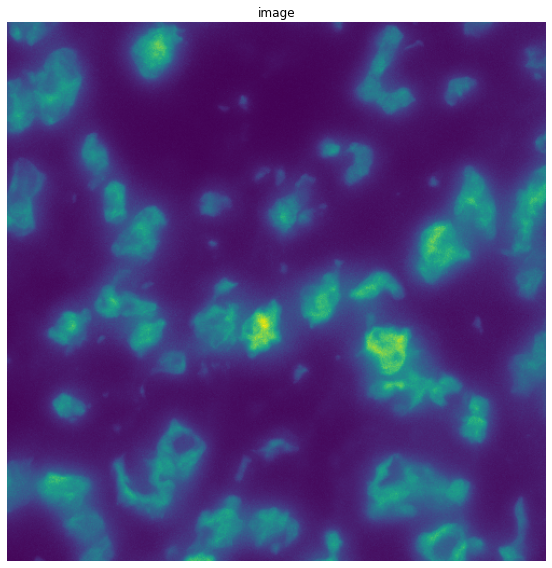

In [3]:
image_file = "../../heart/raw_data/nuclei_PCW4.5_1.tif"
img = sq.im.ImageContainer(image_file)
img_crop = img.crop_corner(6500, 1500, size=500)
img_crop.show()

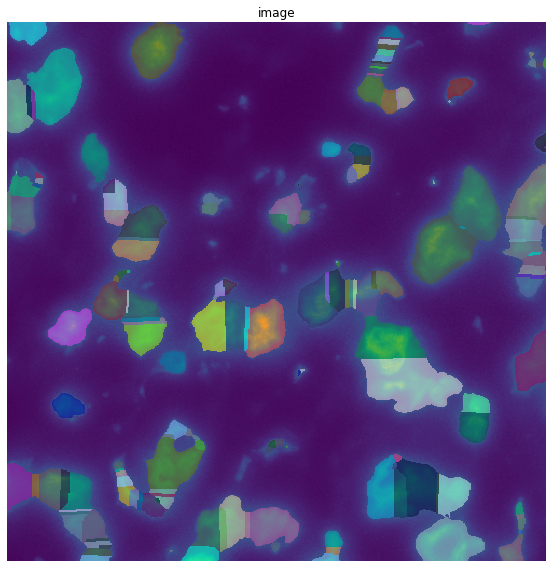

In [8]:
tx.preprocessing.segment_nuclei(img_crop, layer = 'image', method='cellpose')
img_crop.show(layer="image",segmentation_layer="segmented_cellpose", segmentation_alpha = 0.5)

In [50]:
seg_arr = img_crop['segmented_cellpose'].to_numpy()[:,:,0,0]
seg_arr = skimage.segmentation.expand_labels(seg_arr, distance=15)
#skimage.io.imsave('test/segmented_image.tif', seg_arr)


C:\Users\Habib\AppData\Local\Temp\ipykernel_28588\2614193607.py:3: UserWarning: test/segmented_image.tif is a low contrast image
  skimage.io.imsave('test/segmented_image.tif', seg_arr)


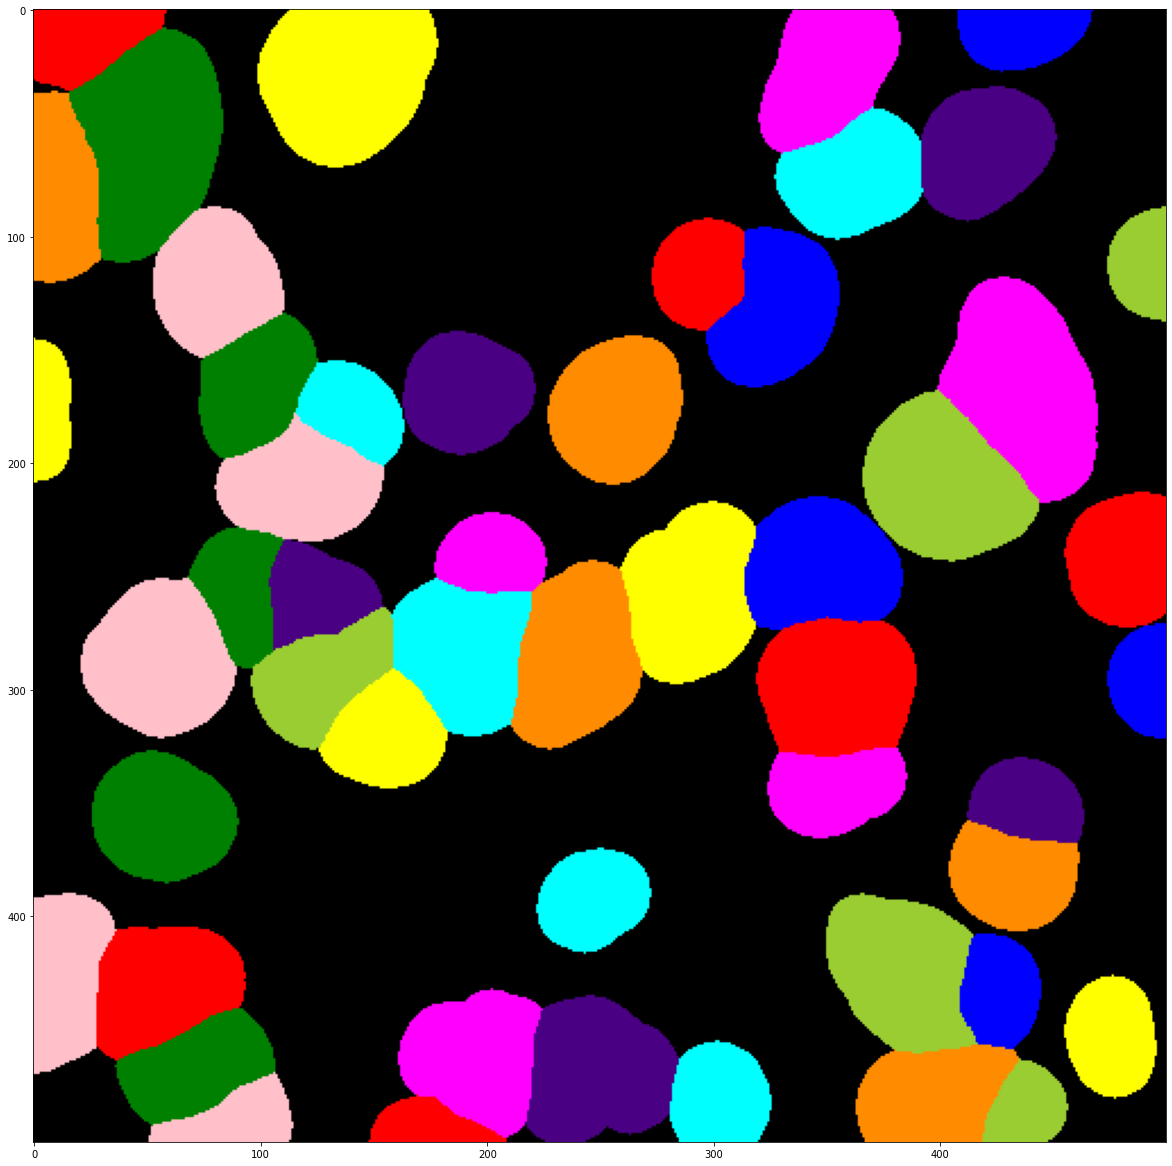

In [11]:
imgmat = skimage.io.imread("../../test/segmented_image.tif")
rgb_label_image = skimage.color.label2rgb(imgmat, bg_label=0)
plt.figure(figsize=(1500/_dpi, 1500/_dpi), dpi=_dpi)
imgplot = plt.imshow(rgb_label_image)
plt.show()

In [12]:

(unique, counts) = np.unique(imgmat, return_counts=True)
areas = np.asarray((unique, counts)).T

In [16]:
spots = pd.read_csv("../../results/test/assignments_custom-0_basic-0.csv")
spots.columns = ['Gene', 'x', 'y','cell']
spots

,Gene,x,y,cell
0,MYL2,81.942,0.135,0
1,SORBS2,383.540,4.380,0
2,MYBPC3,19.395,5.256,1
3,TOP2A,192.754,4.870,0
4,MYOZ2,269.513,4.667,0
...,...,...,...,...
462,MYBPC3,176.022,488.596,51
463,MYBPC3,83.393,489.143,50
464,TOP2A,164.500,493.000,51
465,MYH7,88.967,494.607,50


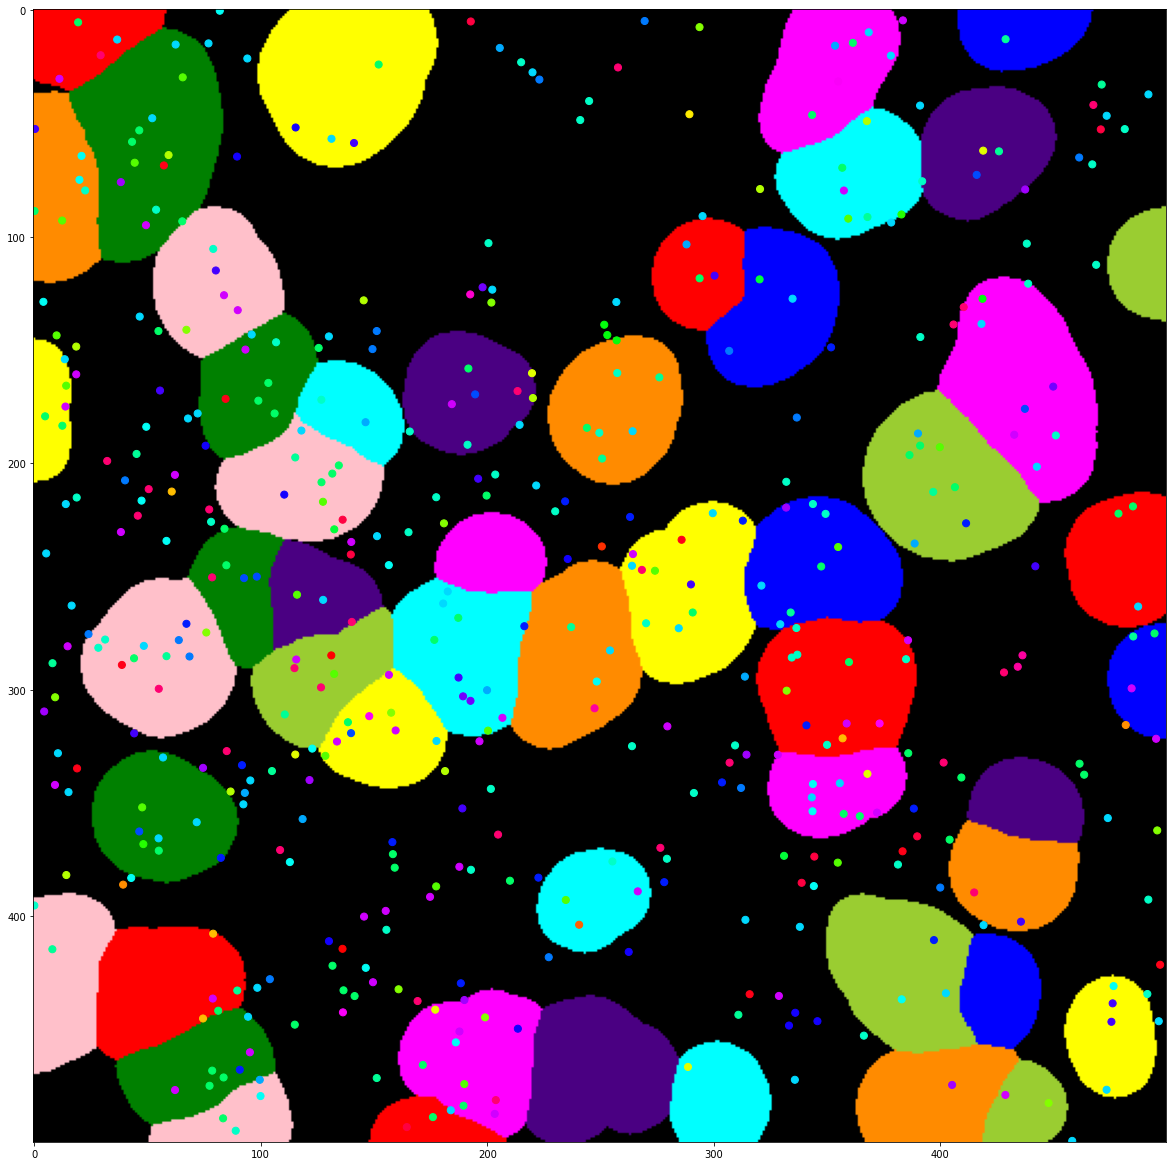

In [17]:
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
imgplot = plt.imshow(rgb_label_image)
plt.scatter(spots.x, spots.y, s=50, c=spots.Gene.astype('category').cat.codes,cmap='hsv')
plt.show()

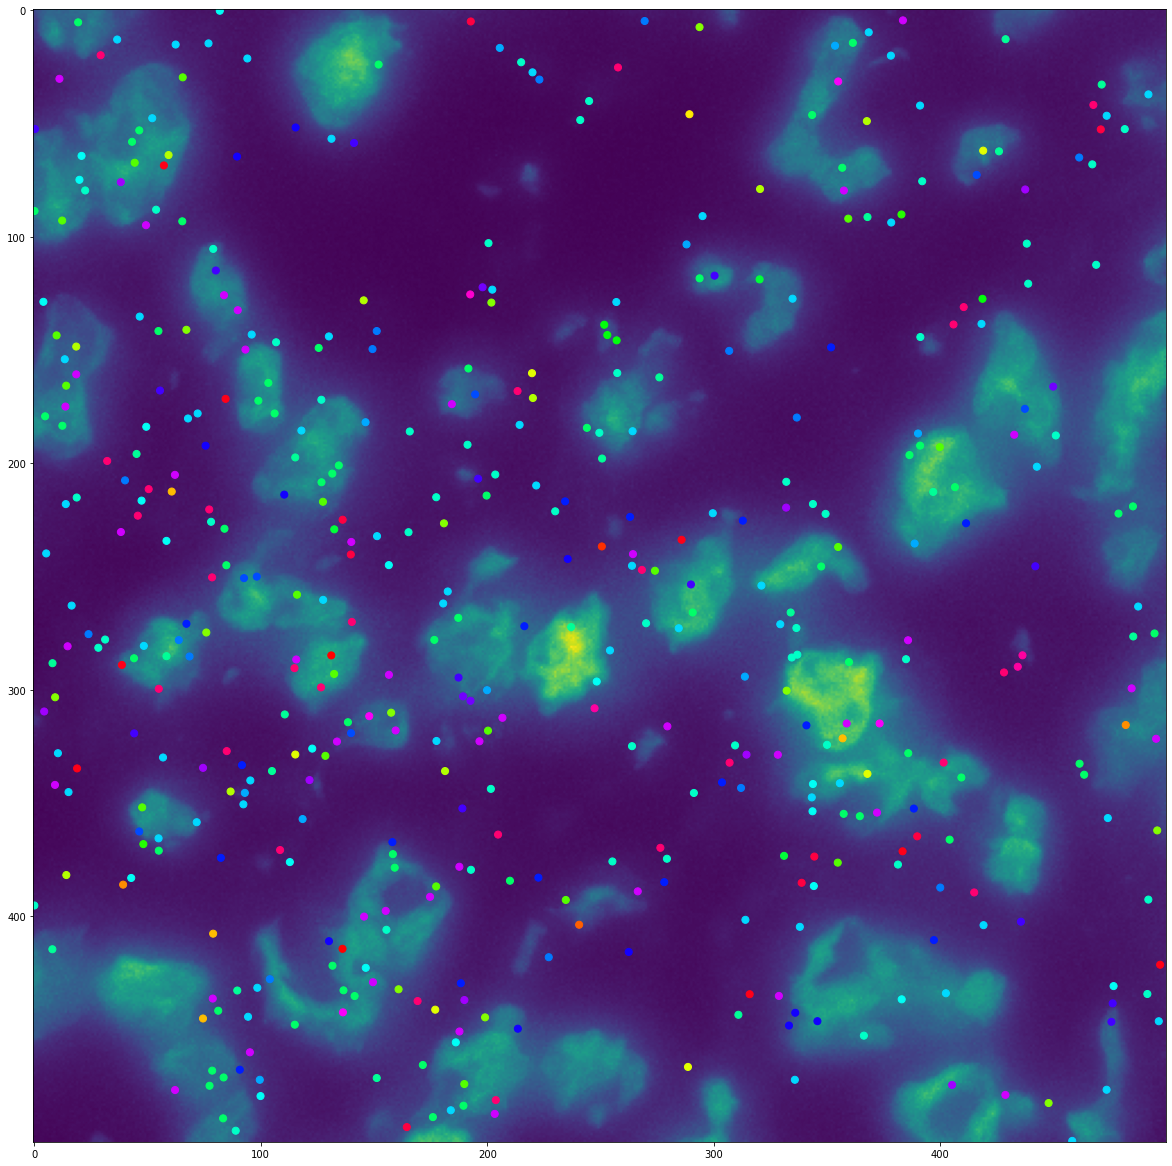

In [19]:
im = plt.imread('../../test/raw_image.tif')
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
imgplot = plt.imshow(im)
plt.scatter(spots.x, spots.y, s=50, c=spots.Gene.astype('category').cat.codes,cmap='hsv')
plt.show()